In [7]:
import numpy as np
import matplotlib.pyplot as plt
import linear_regression as linreg

# Load data
data = np.loadtxt(
    './data/Student_Performance.csv',
    delimiter=',',
    skiprows=1,
    dtype=[
        ('Hours Studied', 'float'),
        ('Previous Scores', 'float'),
        ('Extracurricular Activities', 'U3'),
        ('Sleep Hours', 'float'),
        ('Sample Question Papers Practiced', 'float'),
        ('Performance Index', 'float'),
    ]
)

In [8]:
# Convert data for machine learning
def convert_data(raw_data):
    m = len(data)
    perf_idx = 5
    
    x_train = np.zeros((m, perf_idx))
    y_train = np.zeros(m)
    for i in range(m):
        entry = data[i]
        row = np.zeros(perf_idx)
        for j in range(perf_idx):
            val = entry[j]
            if val == 'Yes':
                val = 1
            elif val == 'No':
                val = 0
            row[j] = val
        x_train[i] = row
        y_train[i] = entry[perf_idx]
    return x_train, y_train
    
x_train, y_train = convert_data(data)

print(x_train[0:10])
print(y_train[0:10])

[[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 [ 5. 52.  1.  5.  2.]
 [ 7. 75.  0.  8.  5.]
 [ 3. 78.  0.  9.  6.]
 [ 7. 73.  1.  5.  6.]
 [ 8. 45.  1.  4.  6.]
 [ 5. 77.  0.  8.  2.]
 [ 4. 89.  0.  4.  0.]]
[91. 65. 45. 36. 66. 61. 63. 42. 61. 69.]


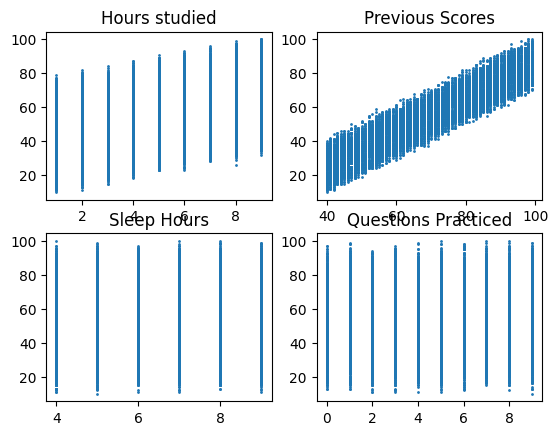

In [9]:
def visualize(X_train, y, y_comp = None):
    # X_train: training input
    # y: either prediction or target
    # y_comp: comparison set
    
    # Visualize data
    fig, axs = plt.subplots(2, 2)

    axs[0, 0].set_title('Hours studied')
    axs[0, 0].scatter(x_train[:, 0], y_train, s=1)
    if y_comp:
        axs[0, 0].scatter(x_train[:, 0], y_comp, s=1)
    
    axs[0, 1].set_title('Previous Scores')
    axs[0, 1].scatter(x_train[:, 1], y_train, s=1)
    if y_comp:
        axs[0, 1].scatter(x_train[:, 1], y_comp, s=1)
    
    axs[1, 0].set_title('Sleep Hours')
    axs[1, 0].scatter(x_train[:, 3], y_train, s=1)
    if y_comp:
        axs[1, 0].scatter(x_train[:, 3], y_comp, s=1)
    
    axs[1, 1].set_title('Questions Practiced')
    axs[1, 1].scatter(x_train[:, 4], y_train, s=1)
    if y_comp:
            axs[1, 1].scatter(x_train[:, 4], y_comp, s=1)
    
visualize(x_train, y_train)

In [10]:
# OPTIONAL: normalize data
mu = np.mean(x_train)
sigma = np.std(x_train)

x_norm = (x_train - mu)/sigma

In [11]:
# Define initial weights and biases
w = np.array(np.random.uniform(0, 20, size=5))
b = np.random.uniform(0, 20)

In [12]:
# Learning rate was chosen through experimenting with different values
# until it becomes too large (cost keeps rising)
learning_rate = 0.3
num_iter = 1000

cost_history, w_res, b_res = linreg.fit(x_norm, y_train, w, b, learning_rate, num_iter)

[0] 585.2999427694676
[100] 16.62907263093471
[200] 11.288112007053526
[300] 7.977058158040881
[400] 5.908497299830815
[500] 4.605181347873876
[600] 3.7761611261478607
[700] 3.2431153155326857
[800] 2.896152632982966
[900] 2.6671639554694053


In [13]:
print(f'Weights and bias found: {w_res}, {b_res}, after, {len(cost_history)} iterations')

Weights and bias found: [70.97231104 28.02266198  1.41382301  4.17886771  3.82679911], 37.66149148243867, after, 1000 iterations


Text(0, 0.5, 'Cost')

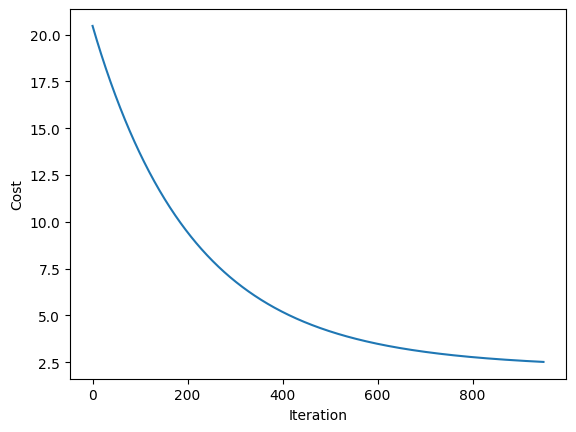

In [14]:
# visualize learning process
fig, ax = plt.subplots()
# discard the first 50 cost values since they drop very quickly
ax.plot(np.arange(len(cost_history[50:])), cost_history[50:])
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

In [15]:
# test first few predictions

def test(X, y, w, b):
    m = X[:10].shape[0]
    for i in range(m):
        prediction = linreg.model(X[i], w, b)
        target = y[i]
        print('{:.2f}  {:.2f}, {:.2f}'.format(prediction, target, abs(prediction - target)))

test(x_norm, y_train, w_res, b_res)

90.54  91.00, 0.46
64.70  65.00, 0.30
43.85  45.00, 1.15
36.79  36.00, 0.79
66.34  66.00, 0.34
59.33  61.00, 1.67
64.03  63.00, 1.03
37.81  42.00, 4.19
62.78  61.00, 1.78
71.58  69.00, 2.58


Our model is able to predict the performance index quite close to the target values, with single digit errors so far.

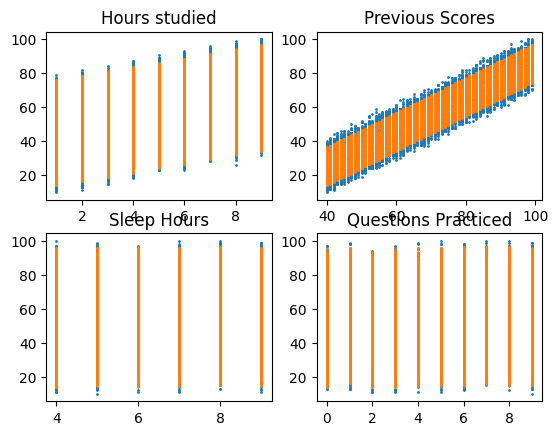

In [17]:
# Evaluate the model
m = x_train.shape[0]
y_predict = []
for i in range(m):
    y_predict.append(linreg.model(x_norm[i], w_res, b_res))

visualize(x_train, y_train, y_predict)

We can see that the orange areas overlap with most of the graph of the training data. This indicates that our model is able to predict quite well so far.

In [18]:
# Scikit-Learn implementation
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
skx_norm = scaler.fit_transform(x_train)

In [19]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(skx_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 11, number of weight updates: 110001.0


In [20]:
b_norm = sgdr.intercept_[0]
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")


model parameters:                   w: [ 7.41242574 17.65588054  0.27692081  0.81901222  0.5881223 ], b:55.22426821274316


In [21]:
# test first few predictions
test(skx_norm, y_train, w_norm, b_norm)

91.80  91.00, 0.80
63.14  65.00, 1.86
45.03  45.00, 0.03
36.49  36.00, 0.49
67.15  66.00, 1.15
59.44  61.00, 1.56
64.42  63.00, 1.42
38.29  42.00, 3.71
62.84  61.00, 1.84
69.85  69.00, 0.85


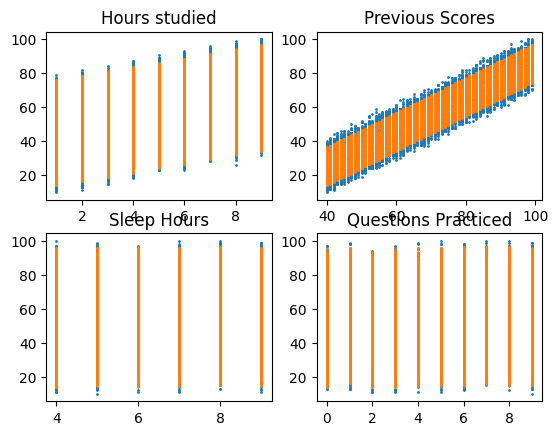

In [22]:
# Evaluate the model
m = x_train.shape[0]
y_predict_sgdr = []
for i in range(m):
    y_predict_sgdr.append(linreg.model(x_norm[i], w_res, b_res))

visualize(x_train, y_train, y_predict_sgdr)

In [23]:
print('Mean and SD of our implementation: {:.2f}  {:.2f}'.format(np.mean(y_predict), np.std(y_predict)))
print('Mean and SD of Scikit-Learn implementation: {:.2f}  {:.2f}'.format(np.mean(y_predict_sgdr), np.std(y_predict_sgdr)))

Mean and SD of our implementation: 55.20  18.91
Mean and SD of Scikit-Learn implementation: 55.20  18.91


Our model and Scikit-learn's model have the same mean and standard deviation. But Scikit-learn runs much faster (instant result vs. couple of minutes)